In [18]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [6]:
!unzip /content/dataset.zip -d /content/dataset


Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/dataset/training_set/cats/cat.370.jpg  
  inflating: /content/dataset/dataset/training_set/cats/cat.3700.jpg  
  inflating: /content/dataset/dataset/training_set/cats/cat.3701.jpg  
  inflating: /content/dataset/dataset/training_set/cats/cat.3702.jpg  
  inflating: /content/dataset/dataset/training_set/cats/cat.3703.jpg  
  inflating: /content/dataset/dataset/training_set/cats/cat.3704.jpg  
  inflating: /content/dataset/dataset/training_set/cats/cat.3705.jpg  
  inflating: /content/dataset/dataset/training_set/cats/cat.3706.jpg  
  inflating: /content/dataset/dataset/training_set/cats/cat.3707.jpg  
  inflating: /content/dataset/dataset/training_set/cats/cat.3708.jpg  
  inflating: /content/dataset/dataset/training_set/cats/cat.3709.jpg  
  inflating: /content/dataset/dataset/training_set/cats/cat.371.jpg  
  inflating: /content/dataset/dataset/training_set/cats/cat.3710.jpg  
  inflating: /content/datase

In [7]:
train_data=ImageDataGenerator(rescale=1./255)

In [8]:
train_dataset=train_data.flow_from_directory("/content/dataset/dataset/training_set",target_size=(224,224),batch_size=128,class_mode="binary")

Found 8000 images belonging to 2 classes.


In [9]:
test_dataset=train_data.flow_from_directory("/content/dataset/dataset/test_set",target_size=(224,224),batch_size=128,class_mode="binary")

Found 2000 images belonging to 2 classes.


In [10]:
nn=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation="relu",input_shape=(224,224,3),padding="same"),
    tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")

])

In [11]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 54, 54, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 64)       0

In [12]:
nn.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [13]:
history=nn.fit(
    train_dataset,epochs=10,validation_data=test_dataset
)

Epoch 1/10
63/63 [==============================] - 1640s 26s/step - loss: 0.6885 - accuracy: 0.5525 - val_loss: 0.6228 - val_accuracy: 0.6465
Epoch 2/10
63/63 [==============================] - 1623s 26s/step - loss: 0.5908 - accuracy: 0.6716 - val_loss: 0.5494 - val_accuracy: 0.7310
Epoch 3/10
63/63 [==============================] - 1595s 25s/step - loss: 0.5394 - accuracy: 0.7220 - val_loss: 0.5148 - val_accuracy: 0.7500
Epoch 4/10
63/63 [==============================] - 1594s 25s/step - loss: 0.4782 - accuracy: 0.7654 - val_loss: 0.4943 - val_accuracy: 0.7610
Epoch 5/10
63/63 [==============================] - 1586s 25s/step - loss: 0.4096 - accuracy: 0.8101 - val_loss: 0.4975 - val_accuracy: 0.7725
Epoch 6/10
63/63 [==============================] - 1588s 25s/step - loss: 0.3389 - accuracy: 0.8472 - val_loss: 0.5495 - val_accuracy: 0.7495
Epoch 7/10
63/63 [==============================] - 1576s 25s/step - loss: 0.2546 - accuracy: 0.8957 - val_loss: 0.5840 - val_accuracy: 0.7620

In [19]:
uploaded_file = files.upload()
uploaded_image_path = list(uploaded_file.keys())[0]

Saving pngwing.com (1).png to pngwing.com (1) (1).png


1/1 [==============================] - 0s 140ms/step
The user-uploaded image is classified as a Cat


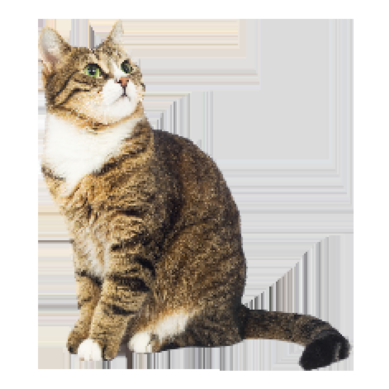

In [20]:
user_img = load_img(uploaded_image_path, target_size=(224, 224))
user_img_array = img_to_array(user_img)
user_img_array = np.expand_dims(user_img_array, axis=0)
user_img_array /= 255.0
user_prediction = nn.predict(user_img_array)
plt.imshow(user_img)
plt.axis('off')
if user_prediction[0][0] >= 0.5:
    print("The user-uploaded image is classified as a Dog")
else:
    print("The user-uploaded image is classified as a Cat")
